In [75]:
# Dependencies
import pandas as pd
import numpy as np
import requests
import json
import datetime
from scipy.stats import linregress

# Import API Key
from config import api_key

In [76]:
# Attempt to get Monthly data from API for USD vs. JPY
try:
    usd_yen = requests.get(f"https://www.alphavantage.co/query?function=FX_MONTHLY&from_symbol=USD&to_symbol=JPY&apikey={api_key}").json()
except:
    print("Something went wrong with the API request.")

In [77]:
# Convert to DataFrame
usdjpy_df = pd.DataFrame(usd_yen['Time Series FX (Monthly)'])
usdjpy_df = usdjpy_df.transpose()
usdjpy_df

,1. open,2. high,3. low,4. close
2024-11-13,152.28700,154.93900,151.34300,154.88800
2024-10-31,143.73599,153.86800,143.53200,151.98000
2024-09-30,146.38100,147.18800,139.57800,143.71001
2024-08-29,149.20100,149.76401,141.69701,144.89000
2024-07-31,161.51199,161.94200,148.50501,149.74400
...,...,...,...,...
2015-04-30,119.57600,120.83300,118.50700,119.45200
2015-03-31,119.84500,121.99600,118.33000,120.02200
2015-02-26,117.18500,120.40200,116.89600,119.37700
2015-01-29,119.89000,120.73600,115.86500,118.24800


In [78]:
# Clean Dataframe
renamed_df = usdjpy_df.rename(columns={"1. open":"Open", "2. high":"High", "3. low":"Low", "4. close":"Close"})
clean_df = renamed_df[["Open", "Close", "High", "Low"]].astype(float)
clean_df["Daily Average"] = clean_df.mean(axis=1)
clean_df
clean_df.index = pd.to_datetime(clean_df.index)
clean_df.head()


,Open,Close,High,Low,Daily Average
2024-11-13,152.28700,154.88800,154.93900,151.34300,153.364250
2024-10-31,143.73599,151.98000,153.86800,143.53200,148.278998
2024-09-30,146.38100,143.71001,147.18800,139.57800,144.214252
2024-08-29,149.20100,144.89000,149.76401,141.69701,146.388005
2024-07-31,161.51199,149.74400,161.94200,148.50501,155.425750


In [79]:
# Summarize Open, Close, High, and Low of USD to JPY
start_time = list(usd_yen["Time Series FX (Monthly)"])[0]
end_time = list(usd_yen["Time Series FX (Monthly)"])[-1]
usdjpy_mean = clean_df["Open"].mean()
usdjpy_median = clean_df["Open"].median()
usdjpy_std = clean_df["Open"].std()
usdjpy_var = clean_df["Open"].var()
print(f"USD to JPY from {start_time} to {end_time} \nUSD to JPY Mean= {round(usdjpy_mean, 2)} \nUSD to JPY Median= {round(usdjpy_median, 2)} \nUSD to JPY STD Error= {round(usdjpy_std, 2)} \nUSD to JPY Variance= {round(usdjpy_var, 2)}")


USD to JPY from 2024-11-13 to 2014-12-31 
USD to JPY Mean= 119.71 
USD to JPY Median= 112.85 
USD to JPY STD Error= 15.26 
USD to JPY Variance= 232.92


y = 0.96x + 9.86


<Axes: title={'center': 'USD to JPY from 2024-03-29 to 2024-07-23'}>

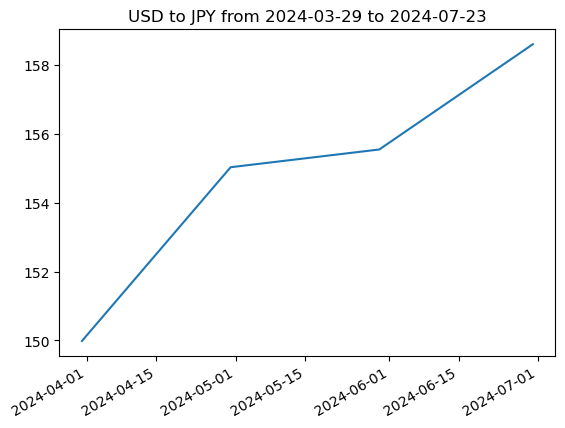

In [80]:
# Make df for Necropolis League
nec_start = pd.to_datetime("2024-03-29")
nec_end = pd.to_datetime("2024-07-23")
nec_time = clean_df[(clean_df.index <= nec_end) & (clean_df.index >= nec_start)]
nec_time_daily = nec_time["Daily Average"]

# Linear Regression for Necropolis League USD->JPY
(slope, intercept, rvalue, pvalue, stderr) = linregress(nec_time["Open"], nec_time["Close"])
nec_line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
print(nec_line_eq)
nec_start_date = nec_start.date()
nec_end_date = nec_end.date()
nec_time_daily.plot(use_index=True, title= f"USD to JPY from {nec_start_date} to {nec_end_date}")

y = 0.55x + 64.35


<Axes: title={'center': 'USD to JPY from 2023-04-07 to 2023-08-15'}, ylabel='JPY to the USD'>

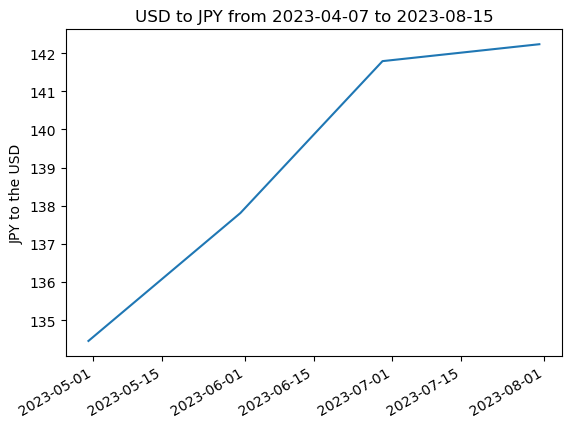

In [81]:
# Make df for Crucible League
cru_start = pd.to_datetime("2023-04-07")
cru_time = clean_df[(clean_df.index <= cru_end) & (clean_df.index >= cru_start)]
cru_time_daily = cru_time["Daily Average"]

# Linear Regression for Crucible League USD->JPY
(slope, intercept, rvalue, pvalue, stderr) = linregress(cru_time["Open"], cru_time["Close"])
cru_line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
print(cru_line_eq)
cru_end = pd.to_datetime("2023-08-15")
cru_end_date = cru_end.date()
cru_start_date = cru_start.date()
cru_time_daily.plot(use_index=True, title= f"USD to JPY from {cru_start_date} to {cru_end_date}", ylabel= "JPY to the USD")


In [82]:
# Necropolis timeframe statistics
nec_mean = nec_time_daily.mean()
nec_median = nec_time_daily.median()
nec_std = nec_time_daily.std()
nec_var = nec_time_daily.var()
print(f"USD to JPY from {nec_start_date} to {nec_end_date} (Necropolis) \nUSD to JPY Mean= {round(nec_mean, 2)} \nUSD to JPY Median= {round(nec_median, 2)} \nUSD to JPY STD Error= {round(nec_std, 2)} \nUSD to JPY Variance= {round(nec_var, 2)}")

USD to JPY from 2024-03-29 to 2024-07-23 (Necropolis) 
USD to JPY Mean= 154.79 
USD to JPY Median= 155.29 
USD to JPY STD Error= 3.57 
USD to JPY Variance= 12.74


In [83]:
# Crucible timeframe statistics
cru_mean = cru_time_daily.mean()
cru_median = cru_time_daily.median()
cru_std = cru_time_daily.std()
cru_var = cru_time_daily.var()
print(f"USD to JPY from {cru_start_date} to {cru_end_date} (Crucible) \nUSD to JPY Mean= {round(cru_mean, 2)} \nUSD to JPY Median= {round(cru_median, 2)} \nUSD to JPY STD Error= {round(cru_std, 2)} \nUSD to JPY Variance= {round(cru_var, 2)}")

USD to JPY from 2023-04-07 to 2023-08-15 (Crucible) 
USD to JPY Mean= 139.07 
USD to JPY Median= 139.8 
USD to JPY STD Error= 3.67 
USD to JPY Variance= 13.44


In [ ]:
# Define function to compare necropolis stats with USD to Yen stats. 
def dtoy_nec(mean, median, stderr, var):
    mean_dif = nec_mean - mean
    median_dif = nec_median - median
    sterr_dif = nec_std - stderr
    var_dif = nec_var - var
    return(f"USD to JPY mean difference: {mean_dif}, median difference: {median_dif}, stderr difference: {sterr_dif}, var difference: {var_dif} ")

In [ ]:
# Define function to compare crucible stats with USD to Yen stats.
def dtoy_cru(mean, median, stderr, var):
    mean_dif = cru_mean - mean
    median_dif = cru_median - median
    sterr_dif = cru_std - stderr
    var_dif = cru_var - var
    return(f"USD to JPY mean difference: {mean_dif}, median difference: {median_dif}, stderr difference: {sterr_dif}, var difference: {var_dif} ")